# MA6202: Laboratorio de Ciencia de Datos

**Profesor: Nicolás Caro**

**27/04/2020 - C8 S4**

# Tratamiento de datos y Exploración 

La el manejo de la información contenida en los datos es la razón principal de la construcción de modelos y esquemas de análisis sobre ellos. Tal información se ve afectada por la calidad de los datos, que en segunda instancia, determina el rendimiento de los modelos planteados. Esto hace que sea critico asegurar un preprocesado y una buena examinación de los datasets a trabajar.

El contenido de esta cátedra, se centra en las técnicas esenciales para el preprocesado de datos. 

## Análisis de datos exploratorio

El análisis exploratorio de los datos (EDA en inglés) consiste e utilizar técnicas de sumarización o agregación, con el fin de conocer la distribución de los datos, confirmar hipótesis y contrastar información. Existen muchas maneras de explorar los datos, por ejemplo, se pueden generan visualizaciones, descripciones del conjunto de datos, se pueden también generar agrupaciones y obtener patrones de tales agrupaciones. 

Un concepto recurrente en el análisis exploratorio de datos consiste en el *perfilamiento* de datos. Este hace referencia a la sumarización por medio de estadística descriptiva, aquí existe una variedad de herramientas que pueden ayudar a comprender mejor los datos disponibles. La meta del perfilamiento de datos consiste en generar respuestas y conocimiento en torno al fenómeno que los datos reflejan. En función de los perfiles generados, se puede tener una idea de la calidad del dataset con lo cual es posible decidir como transformar las variables a disposición. A continuación se da una guía a seguir al momento de explorar los datos

### Perfilamiento Univariado

El punto inicial para comprender la naturaleza de una variable, pasa por caracterizar la forma de su distribución, un histograma permite obtener ideas sobre tal faceta.

**Ejemplo**

Se cargan las librerías iniciales

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats

Se carga el dataset de 'house pricing', este consiste en 80 variables (79 variables explicativas más una variable objetivo), describiendo aspectos fundamentales de hogares residenciales en la ciudad de Ames, Iowa. Este dataset está centrado en la regresión sobre el precio final de cada hogar. A continuación se procede a explorar tal dataset.

In [ ]:
# El conjunto a trabajar es el de entrenamiento
df = pd.read_csv('data/train.csv', index_col = 'Id')
df.head()

La cantidad de observaciones corresponde a 1460, por otra parte, posee 79 variables explicativas más un índice.

In [ ]:
df.shape

Se estudia el tipo de valor y cantidad de información faltante para cada columna

In [ ]:
df.info()

Observado lo anterior y la estructura de la base, se aprecia que los datos de tipo `object` hacen referencia a 'strings' o categorias del dataset. Se crea una lista con aquellas columnas.

In [ ]:
object_type_set = [col for col in df.columns if df[col].dtype == 'O']

Se observa la estructura del dataset en tales columnas, en este caso se decide transformarlas a formato 'str' para obtener visualizaciones sobre sus valores. El proceso de transformar los tipos de datos en un dataframe se conoce como *typecasting*. 

In [ ]:
# Se transoforman las columnas anteriores a 'str'
df = df.astype({col:'str' for col in object_type_set})

Sumado a lo anterior, se agregan niveles de multi indexado a las columnas para indicar si son del tipo numérico o categórico. 

In [ ]:
df.head()

In [ ]:
names = ['numeric', 'categorical']

# Se crea una lista con las columnas numericas
numeric = [
    'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'GarageYrBlt',
    'MSSubClass','Fireplaces','SalePrice'
]

# Se crea una lista con las columnas categoricas
categorical = list(set(df.columns) - set(numeric))
''' 
Se generan mappings para el multi indexado del tipo 

[('numeric', col_if_numeric), ...,('categorical', col_if_categorical),...]
'''

mapping = [('numeric', col) for col in numeric]
mapping.extend([('categorical', col) for col in categorical])
'''
Se reordenan las columnas del dataframe para que coincidan con el esquema 
del multi indice
'''

df = df.reindex(columns=numeric + categorical)

Finalemente se asocia el multi indexado

In [ ]:
# Se reasignan las columnas
df.columns = pd.MultiIndex.from_tuples(mapping)

Como observación, se agrega que la columna 'MSSubClass' se clasifica como categórica pues representa un tipo de sector asociado a la propiedad. 

A continuación, se genera una visualización para entender la geometría de cada distribución, en el caso de las variables continuas, se calcula un estimado de la distribución por medio de `kernel density estimation`, este procedimiento consiste en elegir un tipo de función base (en este caso, una gaussiana con media en cada punto y de varianza constante) posteriormente, se calcula el promedio de las funciones base y se obtiene una función representante de la distribución denominada como 'density estimator', esto se hace por medio del método `sns.displot` de la librería `seaborn`. 

In [ ]:
# Grilla de subplots
fig, ax = plt.subplots(nrows=6, ncols=4, figsize=[17, 17])

# Se remueven el ultimo plot
list(map(lambda a : a.remove(), ax[-1,-1:]))

# Se ajusta el espaciado exterior de la figura
fig.tight_layout()

# Se define un titulo y su ubicacion
fig.suptitle('Distribuciones Univariadas Numéricas',
             fontsize=20,
             x=0.5,
             y=1.05)
'''
Se recorre cada axis, para cada columna del dataframe, se genera un grafico 
distinto en funcion del tipo de dato.

'''
for axis, col in zip(ax.flatten(), numeric):

    # Graficos para datos numericos
    sns.distplot(df[('numeric', col)], ax=axis, rug=True)
    axis.set_xlabel(col, fontsize=15)

# Se ajusta el espaciado interno entre subplots
w, h = (.4, .4)
plt.subplots_adjust(wspace=w, hspace=h)

Para las variables categóricas, se genera un conteo de valores únicos. Dado que se buscan las distribuciones de forma visual, se elimina información referente a las escalas, que dada la cantidad de gráficos a obtener, solo entorpece el análisis.

In [ ]:
# Grilla de subplots
fig, ax = plt.subplots(nrows=10, ncols=6, figsize=[17, 17])

# Se remueven los ultimos 3 plots
list(map(lambda a : a.remove(), ax[-1,-3:]))

# Se ajusta el espaciado exterior de la figura
fig.tight_layout()

# Se define un titulo y su ubicacion
fig.suptitle('Distribuciones Univariadas Categóricas',
             fontsize=20,
             x=0.5,
             y=1.05)
'''
Se recorre cada axis, para cada columna del dataframe, se genera un grafico 
distinto en funcion del tipo de dato.

'''
for axis, col in zip(ax.flatten(), categorical):

    # Graficos para datos tipos str
    sns.countplot(df[('categorical',col)], ax=axis)
    axis.set_axis_off()
    axis.set_title(col, fontsize=15)
  
    
# Se ajusta el espaciado interno entre subplots
h, w = (.4, .1)
plt.subplots_adjust(wspace=w, hspace=h)

Al observar las distribuciones, es importante buscar si existe variabilidad dentro de estas, pues por lo general, una variable con un único valor casi seguro, no aporta información a la dinámica de los datos.

**Ejemplo**

Se observa la variable 'Heating' (categórica) y se compara con la variable de interés 'SalePrice'. Para ello se usa un gráfico de categórias tipo violín

In [ ]:
# Sirve para fija el tamaño de lasetiquetas del plot
fontdict = {'fontsize':20}

# Estrucutra de figura y axes
fig, ax = plt.subplots(2,1,figsize=[12,13])

# violin plot --> equivalente a catplot(kind = 'violin')

sns.violinplot(('categorical', 'OverallQual'),
            y=('numeric', 'SalePrice'),
            data=df,
            kind='violin',
            ax=ax[0])

sns.countplot(df[('categorical','OverallQual')], ax=ax[1])

ax[0].set_xlabel('OverallQual', fontdict)
ax[1].set_xlabel('OverallQual', fontdict)

ax[0].set_ylabel('SalePrice', fontdict)
ax[0].set_title('Violin plot OverallQuall vs SalePrice', fontdict)
ax[1].set_title('Frecuencias OverallQuall', fontdict)

h, w = (.3, .1)
plt.subplots_adjust(wspace=w, hspace=h)

Un gráfico de violín permite sumarizar y observar características de un dataset. Este se comporta como un gráfico de cajas (boxplot), mostrando la mediana, el rango intercuantílico IQR (percentil 75 - percentil 25, o Q3 - Q1) y el rango 1.5 intercuantílico (Q3 +- 1.5 IQR). Además de lo anterior, se suma una estimación de la densidad por kernel a cada lado. Esto quiere decir, que zonas con mayor densidad, se verán como 'montes' horizontales. 

En el caso de 'OverallQuall', se ve una clara relación entre los distintos niveles de está variable en contraste con difierentes distribuciones de 'SalePrice'. Junto con una distribción que presenta variabilidad, se podría considerar como una de interés. 


Por otra parte, analizando las gráficas univariadas, se puede observar que para 'LandSlope', se tiene poca variablidad y no genera diferencias en distribución para 'SalePrice' en ninguna de sus categorias. 

In [ ]:
# Sirve para fija el tamaño de lasetiquetas del plot
fontdict = {'fontsize':20}

# Estrucutra de figura y axes
fig, ax = plt.subplots(2,1,figsize=[12,13])

# violin plot --> equivalente a catplot(kind = 'violin')

sns.violinplot(('categorical', 'LandSlope'),
            y=('numeric', 'SalePrice'),
            data=df,
            kind='violin',
            ax=ax[0])

sns.countplot(df[('categorical','LandSlope')], ax=ax[1])

ax[0].set_xlabel('LandSlope', fontdict)
ax[1].set_xlabel('LandSlope', fontdict)

ax[0].set_ylabel('SalePrice', fontdict)
ax[0].set_title('Violin plot LandSlope vs SalePrice', fontdict)
ax[1].set_title('Frecuencias LandSlope', fontdict)

h, w = (.3, .1)
plt.subplots_adjust(wspace=w, hspace=h)

**Ejercicios**

1. Los gráficos generados anteriormente siguen exactamente el mismo patrón de generación, lo único que cambia es la columna a analizar. Esto es una mala práctica pues siempre se debe buscar reutilizar código o 'no repetirse' esto se conoce como principio DRY (don't repeat yourself). Construya una función que permita visualizar columnas categóricas del dataset y compararlas con 'SalePrice'. 

2. En función de las visualizaciones construidas, discuta que variables categóricas pueden ser de interés para predecir 'SalePrice'. Busque variabilidad y separación en la distribución de precios. ¿Qué ocurre si una variable categórica posee poca variablidad pero genera buenas separaciones en  'SalePrice'?

Para comparar las variables numéricas, se pueden utilizar gráficos de dispersión contra 'SalePrice'. En este caso, se buscan variabilidad en el histograma univariado y a la vez, se buscan relaciones funcionales (del tipo lineal, exponencial, cuadrático, etc..) con 'SalePrice'. 

**Ejemplo**

Debido a su distribución, se estudia la variable 'GrLivArea', en este caso se define una función para gráficar variables numéricas.

In [ ]:
def scatter_dists(col, df=df, h=.3, w=.1, fontdict={'fontsize': 20}, reg=True):
    ''' Recibe una columna numerica y genera una visualizacion comparativa.
    
    Genera una figura por sobre el dataframe HousePricing (por defecto), recibe 
    parametros extra como el espaciado entre subfigura.
    
    Args:
    ----------
    
    col: String
         El nombre de la columna numerica a visualizar
    
    h,w: float
        Espaciado entre subplot h -> vertical, w -> horizontal
    
    fontdict: dict
             Permite configurar las fuentes de los subplots
    reg: bool
         Permite graficar una regresion lineal sobre los datos (if True)
        
    Returns: None
        Se muestra una figura en pantalla    
    
    '''

    # Estrucutra de figura y axes
    fig, ax = plt.subplots(2, 1, figsize=[12, 13])

    # violin plot --> equivalente a catplot(kind = 'violin')

    if reg:
        sns.regplot(x=df[('numeric', col)],
                    y=df[('numeric', 'SalePrice')],
                    ax=ax[0])
        ax[0].set_title('Regplot plot {} vs SalePrice'.format(col), fontdict)
    else:
        sns.scatterplot(('numeric', col),
                        y=('numeric', 'SalePrice'),
                        data=df,
                        ax=ax[0])
        ax[0].set_title('Scatter plot {} vs SalePrice'.format(col), fontdict)

    
    # Distribucion univariada
    sns.distplot(df[('numeric', col)], ax=ax[1])

    ax[0].set_xlabel(col, fontdict)
    ax[1].set_xlabel(col, fontdict)

    ax[0].set_ylabel('SalePrice', fontdict)
    ax[1].set_title('Frecuencias {}'.format(col), fontdict)

    plt.subplots_adjust(wspace=w, hspace=h)
    

In [ ]:
scatter_dists('GrLivArea')

En este caso, se puede observar una distrbución univariada bien definida y un comportamiento lineal aunque ruidoso. Esto hace que 'GrLivArea' sea una variable de interés. De la misma manera, '1stFlrSF', parece reflejar las mismas buenas características. 



In [ ]:
scatter_dists('1stFlrSF') 

En el caso de 'TotalBsmtSF' se tiene

In [ ]:
scatter_dists('TotalBsmtSF')

Una relación menos lineal con un poco más de ruido pero una buena distribución en e dataset. Esta variable puede ser de interés pero esto se puede estudiar a posteriori. 

Finalmente para 'MasVnrArea', se tiene

In [ ]:
scatter_dists('MasVnrArea', reg = False)

Se aprecia una distribución altamente concentrada y poco relacionada con la variable a predecir, a priori, se puede considerar como una variable de poco interés en el análisis. 

**Ejercicio**

1. Estudie las siguientes proposiciones: 

    1.'OverallQual' y 'YearBuilt' parecen relacionadas con 'SalePrice'. 
    2. En el caso de 'OverallQual', esta relación es bastante débil.
    3. En el caso de 'YearBuilt', esta relación es bastante débil.
    4. Los gráficos de caja para 'OverallQual contra  'SalePrice' muestran cierta linealidad con respecto a 'SalePrice'.

2. Estudie la distribución univariada de 'SalePrice', a continuación ejecute el test K^2 de D’Agostino usando `normaltest` del módulo `stats` de SciPy. Compare para una significancia de 5%. ¿ Se puede tratar esta variable como distribuida de manera normal, tomando en cuenta su comportamiento estadístico?

3. Las distribuciones de 'TotalBsmtSF' y '1stFlrSF' parecen bastante similares, más aún sus relaciones con 'SalePrice' comparten una tendencia. Ejecute el [test de Kolmogorov-Smirnov ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html) por medio de `ks_2samp` para explorar la hipótesis:

 ```'TotalBsmtSF' y '1stFlrSF' vienen de la misma distribución```
 
4. Estudie algunos estadísticos de interés según el tipo de dato.
    
    1. Para las variables numéricas estudie promedios, desviaciones estándar y rangos intercuartílicos. Utilice los rangos calculados para tener una idea del porcentaje de valores fuera de tales rangos por columna. 
    
    2. Para variables catégoricas calcule frecuencias, proporciones y modas. Utilice lo anterior para obtener alguna idea de la variabilidad de los datos.
    

### Perfilamiento Bivariado

Basándose en el perfilamiento anterior, es de utilidad observar relaciones entre variables de interés. Para esto se pueden emplear visualizaciones a pares. 

**Ejemplo**

Se selecciona un conjunto de variables de interés y se investigan sus relaciones bivariadas.

In [ ]:
# Se genera una función auxiliar

def indexer(cols, t_c = df.columns):
    '''Genera columnas multinivel a partir de nombres de columna planos.'''
    
    set_to_tuple = set(*[cols])

    tuples = [
        i for i in t_c if set_to_tuple.intersection(set(i))
    ]
    
    return tuples

Se selecciona un conjunto de variables a examinar

In [ ]:
interest = [
    'SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
    'FullBath', 'YearBuilt'
]

idxs = indexer(interest)

In [ ]:
df[idxs].head()

Se procede a observar el comportamiento bivariado de las columnas seleccionadas

In [ ]:
# Pone SalePrice al final de la lista
idxs.sort()
idxs.remove(('numeric', 'SalePrice'))
idxs.append(('numeric', 'SalePrice'))

In [ ]:
'''
Seaborn presenta problemas para multi indices en columnas, se 
procede a eliminar el nivel exterior y a obtener la visualización
correspondiente.
'''
data = df.reindex(idxs, axis=1).droplevel(0,axis=1)
sns.pairplot(data = data, diag_kind='kde')

La última fila de la visualización anterior entrega una idea de la relación entre 'SalePrice' y las demás variables de interés. Dentro de estas relaciones, se observan ciertos comportamientos lineales y en particular para 'OveralQuall' y 'YearBuilt' se observa cierta exponencialidad. Dentro de las interacciones entre variables, se observa que 'GrLivArea' y 'TotalBsmtSf' se comportan de manera similar contra 'OverllQuall', esperandose cierta tendencia creciente en ambos casos.

Los análsis iniciales basados en visualizaciones sirven para comprender a grandes rasgos la estructura del dataset. Este tipo de exploración debe ser acompañada de tests estadísticos como los vistos en los ejercicios anteriores. En el caso del perfilamiento bivariado se puede usar una técnica mixta, basada en el análisis de las correlaciones.

**Ejemplo**

Se construye una matriz de correlaciones y se visualiza para todo el dataset.

In [ ]:
corrmat = df.corr()

se muestran las dos variables más correlacionadas (positivamente) con 'SalePrice'.

In [ ]:
col = indexer(['SalePrice'])
corrmat[col].nlargest(3,col)

En cuanto a correlación negativa, no se ven relaciones lineales inversas de mayor fortaleza 

In [ ]:
corrmat[col].nsmallest(3,col)

Se procede a visualizar

In [ ]:
'''
Se inserta 'SalePrice' como primera fila x columna de la matriz de correlacion
'''

unsorted = list(corrmat.columns)
unsorted.remove(*col)
unsorted.insert(0, *col)

sortd = pd.MultiIndex.from_tuples(unsorted)
corrmat = corrmat.reindex(index = sortd, columns = sortd)
'''
Dado lo anterior, se ajusta el anchor de colores con maximo en .9
y -0.5, para tener una perspectiva entorno a los valores maximos 
de correlacion (negativa y positiva)
'''

fig, ax = plt.subplots(figsize=[16, 14])

sns.heatmap(corrmat, vmin=-.5, vmax=.9, linewidths=.01)

Según el esquema de valores, se buscan los puntos más claros y más oscuros fuera de la diagonal. En primera instancia, las variables  'TotalBsmtSF' y '1stFlrSF' parece bastante correlacionadas, lo mismo ocurre con la variables 'GarageCars' y 'GarageArea', esto puede indicar multicolinearidad que implica información duplicada o relacionada de manera trivial en el dataset. 

Las correlaciones con 'SalePrice' deben ser analizadas con más detenimiento, aquí se ve que  'GrLivArea', 'TotalBsmtSF', y 'OverallQual' juegan un papel preponderante.

**Ejercicio**

1. Obtenga las 15 correlaciones más altas (positiva o negativa) con 'SalePrice'. Reindexe la matriz de correlaciones, de manera tal que contenga 1's en la diagonal y 'SalePrice' sea la primera fila - columna. 

2. Muestre los coeficiente de correlación dentro de cada casilla del gráfico de correlaciones. Utilice esa información en conjunción con el perfilamiento univariado para filtrar variables de interés.

Las correlaciones pueden ser interpretadas con datos mixtos pero se recomienda analizar sus valores cuando se trabaja con valores continuos (comparación variable continua vs continua). Para analizar valores categóricos (categórico vs categórico) existen herramientas especializadas una de ellas es por medio de tablas de dos tratamientos o de contingencia (2 way tables). 

**Ejemplo**

Se construye una tabla para analizar 'OverallQual' vs 'GarageCars'

In [ ]:
to_compare =['OverallQual','GarageCars']
data_cat = df['categorical']

kwargs = {'index': data_cat[to_compare[0]], 'columns': data_cat[to_compare[1]]}

# Se construye la tabla
tabla = pd.crosstab(**kwargs, margins=True, margins_name='Total')
tabla

En el caso anterior, la función `pd.crosstab(**kwargs, margins=True, margins_name='Total')` es equivalente a

```python
data_cat.pivot_table(**kwargs, values = 'OverallQual',aggfunc='count', fill_value=0)
```
y permite calcular el numero de ocurrencias de una variable para cada una de sus categorías en comparación con los valores de otra variable. Se añaden los totales como margenes de la tabla. En este caso, podemos deducir las interacciones entre las variables, de manera similar como actúa la correlación en variables continuas. 

Para el caso de  'OverallQual' y 'GarageCars' vemos que tienden a acumularse dentro de una rango reducido, se puede concluir que a medida que 'OverallQual' crece entre 4 y 6, aparece un aumento considerable en la categoría 'GarageCars' hasta que esta última llega al valor 2, valores superiores paracieran ser independientes de 'OverallQual'. 

**Ejercicios**

1. Compare variables categóricas usando este método, ¿ se puede encontrar alguna relación entre categórias?

2. Es posible aplicar este método para comparar variables categóricas y continuas, para esto se necesita categorizar la variable continua objetivo. Categoríce la variable 'SalePrice' en 5 tramos y compare con 'OverallQual' ¿Se observa alguna tendencia?


Otra forma de comparar variables categóricas es por medio de un test $\chi^2$. Este permite obtener un indicador de significancia estadística entre variables. Se basa en una tabla de contingencia y proporciona la probabilidad de que dos variables categóricas sean independientes basádandose en el estádistico $\chi^2$, entrega también un arreglo con frecuencias esperadas.

In [ ]:
from scipy.stats import chi2_contingency

# Se debe trabajar la tabla sin margenes
tabla = pd.crosstab(**kwargs, margins=False)

chi2, p, dof, ex =chi2_contingency(tabla)

La tabla de frecuencias esperadas se puede interpretar de la siguiente forma:

In [ ]:
expected_freq = pd.DataFrame(ex, index=range(1,11))
expected_freq.index.name = 'OverallQual'
expected_freq.columns.name = 'GarageCars'
expected_freq

Aquí, la frecuencia esperada para la la categoría 1 'OverallQual' de estar en la categoría 0 de 'GarageCars' es 0.11. Se puede decir que esta configuración es muy poco probable en comparación a otras como pertenecer a la categoría 6 de 'OverallQual' y 2 de 'GarageCars'. Este tipo de tablas permite clasificar las relaciones entre variables categóricas y obtener *insights* sobre las dinámicas que el dataset refleja. 

El valor $p$ entregado por el cáculo corresponde a:

In [ ]:
p 

Si para este test llamamos $\alpha$ al valor de significancia, se puede resumir:

1. Si $p > \alpha$ no hay evidencia para rechazar la hipótesis nula por lo que se pueden considerar independientes.

2. Si $p \leq \alpha$ hay evidencia para rechazar la hipótesis nula por lo que se puede decir que existe una dependencia estadística entre las variables. 


Para una significancia del 5% , hay evidencia para rechazar la hipótesis de independencia entre 'OverallQual' y 'GarageCars', luego puede existir un factor latente que las relaciona (¿será 'SalePrice'?)

In [ ]:
p <= 0.05

Como consideración general, para que este test sea consistente estadísticamente, se deben observar frecuencias (esperadas y observadas) mayores a 5. 

**Ejercicio**

1. Utilice el gráfico de correlaciones para escojer dos variables categóricas de interés. Verifique si existen relaciones estadísticas entre ellas. 

Finalmente, para comparar variables numéricas y categóricas, es posible utilizar técnicas especializadas como lo son los tests Z y T. Estos tests se utilizan de manera simultanea con gráficos de caja (o violín), donde cada caja representa una categoría. 

Tanto el test Z como el T permiten verificar si las medias de dos grupos son estadísticamente diferentes entre si. aquí, el estadístico Z se define por

\begin{equation}z=\frac{\left|\bar{x}_{1}-\bar{x}_{2}\right|}{\sqrt{\frac{s_{1}^{2}}{n_{1}}+\frac{s_{2}^{2}}{n_{2}}}}\end{equation}

Si su probabilidad asociada es pequeña, entonces **la diferencia de las medias** es significativa. 

Por otra parte, el estadístico T es más robusto a tamaños de observaciones pequeños (menores que 30 por ejemplo), este viene dado por 

\begin{equation}
t=\frac{\bar{X}_{1}-\bar{X}_{2}}{\sqrt{S^{2}\left(\frac{1}{N_{1}}+\frac{1}{N_{2}}\right)}}
\end{equation}

Donde 

\begin{equation}
S^{2}=\frac{\left(N_{1}-1\right) S_{1}^{2}+\left(N_{2}-1\right) S_{2}^{2}}{N_{1}+N_{2}-2}
\end{equation}

Aquí , $\bar{X}_{1}, \bar{X}_{2}$ son las medias, $S_{1}^{2}, S_{2}^{2}$ varianzas y $N_1$ , $N_2$ los totales de cada grupo a testear. 

**Ejercicios**

1. Utilice el test de independencia $t$ (o 2 - sample $t$-test) para comparar 2 variables continuas de interés. [*Hint*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

2. Observe que el caso categórico vs continuo, cada categoría representa un grupo de valores continuos asociados. Por ejemplo, si la variable categórica `A` tiene las categorías `c_1` y `c_2`, al compararla con la variable continua `B`, es necesario agrupar los valores de `B` para `c_1` y para `c_2` para luego estudiar su independencia. Utilice el test anterior para medir independencias de grupos entre una variable categórica vs 'SalePrice'. **Obs**: La variable categórica debe ser bivariada.

3. Utilice el test Z con las variables anteriores y compare. ¿Qué restricciones extra posee este test?

Finalmente, se puede hacer uso de un test F o ANOVA. Este test permite comparar más de una media al mismo tiempo, una manera simple de aplicar este test consiste en método conocido como **one way ANOVA**, aquí, se testea si más de 2 grupos son similares basados en sus medias. En este caso, la hipótesis nula es 

`No hay diferencia significativa entre los grupos`

**Ejemplo**

Se selecciona la variable 'GarageCars' y se compara con 'SalePrice'. 

In [ ]:
idx = indexer(['SalePrice','GarageCars'])
grouped = df[idx].groupby(idx[1])

En la variable 'GarageCars' se distinguen 5 categorías

In [ ]:
len(df[idx[1]].unique())

a partir de la agrupación anterior, se forman entonces 5 grupos de valores para 'SalePrice'.

In [ ]:
len(grouped.groups)

Se obtienen los grupos

In [ ]:
total_groups = len(grouped.groups)
groups = [grouped.get_group(i) for i in range(total_groups)]

Se muestra el grupo correspondiente a la categoría 0

In [ ]:
groups[0].head()

Se limpia el formato de cada grupo

In [ ]:
def group_cleaner(group):
    ''' Limpia un grupo.
    Reconoce la categoria del grupo, en la posicion [:,1], 
    guarda ese nombre y elimina la columna de categoria, 
    posteriormente renombra la columna.
    
    Args:
    ----------
    
    group: pandas Groupby object
          Recibe una agrupacion para categorias
          
    Returns:
    ----------
        pandas Grppuby object
        Entrega el grupo ordenado.
    '''
    group_0 = group.copy()
    name = group_0.iloc[0,1]
    group_0.drop(indexer(['GarageCars']), axis=1, inplace=True)
    group_0.columns  = ('cat_{}'.format(name),)
    
    return group_0

se procede a limpiar

In [ ]:
groups_to_test = list(map(group_cleaner, groups))

Se muestra el grupo correspondiente a la categoria 0 post limpieza

In [ ]:
groups_to_test[0].head()

Se procede a testear

In [ ]:
from scipy.stats import f_oneway

F,p = f_oneway(*groups_to_test)

print('Estadistico F:',F)
print('p valor :', p)

probando para una significancia del 5% se tiene hay evidencia para rechazar la hipótesis nula y por tanto hay una diferencia significativa entre los grupos. 

In [ ]:
alpha = 0.05
p <= alpha

**Ejercicio**

1. Compruebe el resultado del test ANOVA anterior con un analísis visual por medio de gráficos de violín.

## El problema de los datos faltantes 

Los métodos estándar de manejo de datos han sido desarrollados para para analizar arreglos tabulares. Por lo general las filas de tal arreglo representan observaciones y las columnas sus características asociadas. Cada entrada en este arreglo puede ser modelada como un número, siendo este ligado a un proceso subyacente continuo o discreto. Para comprender tal proceso, es de utilidad sumarizar y observar los valores faltantes con el fin de obtener patrones y seleccionar estrategias para tratarlos. 

### Exploración de valores faltantes

Cuando los datos faltantes se encuentran en variables que no son de interés, se pueden obviar y pasar a trabajar directamente en ingeniería de *features* e implementación de modelos de aprendizaje automático, por tal motivo, el análisis exploratorio y visualización se considera como primer paso en un procedimiento de análsis de datos. Sin embargo, una exploración preliminar de valores faltantes puede ser útil en conjunto con los perfilamientos visuales y estadísticos realizados.

**Ejemplo**

Observe que en los perfilamientos anteriores, las variables categóricas:

```python
var_missing = ['GarageQual', 'GarageCond', 'BsmtFinType1','BsmtCond', 'GarageFinish', 'Fence', 'BsmtExposure',  'BsmtQual', 'MiscFeature', 'GarageType', 'Electrical', 'FireplaceQu', 'BsmtFinType2','MasVnrType']
```
Parecen no tener valores faltantes.

In [ ]:
var_missing = [
    'GarageQual', 'GarageCond', 'BsmtFinType1', 'BsmtCond', 'GarageFinish',
    'Fence', 'BsmtExposure', 'BsmtQual', 'MiscFeature', 'GarageType',
    'Electrical', 'FireplaceQu', 'BsmtFinType2', 'MasVnrType'
]

var_missing = indexer(var_missing)

df[var_missing].isnull().sum()

Sin embargo, basta observar las columnas para comprender que tales variables si poseen valores faltantes

In [ ]:
df[var_missing].head()

Por tal motivo es necesario realizar una exploración inicial de los datos faltantes en conjunción con los análisis de distribución iniciales. 

**Ejercicios**

1. Estudie la distribución de los valores faltantes en las variables numéricas.

2. Considerando que para las variables categóricas las variables con valor 'nan' son consideradas como una nueva categoría. ¿Se ven afectados los análisis anteriores sobre sus distribuciones?

**Ejemplo**

Para estudiar en mayor profundidad la distribución de los valores faltantes, se procede a transformarlos en formato `np.nan`

In [ ]:
df.replace('nan',np.nan, inplace = True) 

En términos generales, los valores perdidos de este dataset se encuentran relativamente limpios pues están estandarizados con la categoría 'nan'.


Dado que sumarizar valores faltantes genera una estructura de datos, vale la pena explorarla visualmente, para facilitar tal tarea, existe la librería `missingno`

In [ ]:
import missingno as msno

Las visualizaciones de generadas por medio de esta librería pueden ser utilizadas para discutir el problema de valores faltantes y generan una estrategia para su tratamiento.

**Ejemplo**

Se genera una visualización sobre la distribución de valores perdidos en el dataset. En primer lugar, se confirma que la conversión 'nan' $\mapsto$ `np.nan` sea reconocida en el dataset

In [ ]:
df.isnull().sum()

Vemos que en efecto aparecen los valores faltantes antes ignorados. En este apartado se observa que dentro de las variables categóricas se encuntra la mayor cantidad de información perdida. 

In [ ]:
df.isnull().sum().nlargest(10)

mediante la libreria `missingno` es posible ver el panorama completo de los valores faltanes en el dataset de manera sencilla 

In [ ]:
fig, ax = plt.subplots(figsize = [15, 10])
msno.matrix(df,ax = ax, sparkline=False)

**Ejercicio**

1. Genere un subconjunto con las 10 columnas con mayor información faltante y genere el gráfico anterior sin usar un objeto `axes` y con la opción `sparkline=True`.

Esta visualización muestra que exiten columnas practicamente sin información, según la agregación anterior, estas corresponden a 'PoolQC', 'MiscFeature' y 'Alley'. 

Por medio de correlaciones entre valores faltantes, es posible obtener un análisis bivariado análogo al anteriormente generado. Para ello se puede utilizar un mapa de calor.

In [ ]:
fig, ax = plt.subplots(figsize = [15, 10])
msno.heatmap(df, ax = ax)

Este gráfico muestra correlaciones de nulidad entre pares de variables, estas varian desde -1 a 1, donde -1 significa que las variables son excluyentes, es decir, la aparición de una hace que la otra este ausente. Por otra parte el valor 1 corresponde inclusión, esto quiere decir, que la aparición de una hace que la otra aparezca. Valores cercanos a 0 (sin valor numérico en el gráfico) indican ausencia de relación de nulidad entre las variables.

En el gráfico recien generado, no se observen relaciones de nulidad negativa, por otra parte, existen variables fuertemente relacionadas en cuanto a su información como lo son 'MasVnrType' y 'MasVnrArea', el comportamiento general es que la información esta fuertemente relacionada (en el sentido de inclusión de información) o simplemente no lo está. 


**Ejercicio**

1. El gráfico de correlaciones de nulidad permite tener una idea de como se relaciona la información faltante en pares de variables. Para comparar más de dos variables es posible utilizar un *dendograma*. Utilice las 20 variables con mayor cantidad de valores faltanes visualice su dendograma por medio de `msno.dendogram`. Interprete los resultados.[*Hint*](https://github.com/ResidentMario/missingno)




### Una perspectiva teórica

Para dar un contexto teórico al problema de valores faltantes, se define la matriz de datos $Y=\left(y_{i j}\right)$, la cual representa un arreglo rectangular de datos. Para cada elemento de esa matriz, se asocia una variable indicadora, que da lugar a una *matriz indicadora de información faltante* definida por  
$R=\left(r_{i j}\right)$. 

Por simplicidad, se puede asumir que las filas $\left(y_{i}, r_{i}\right)$ son i.i.d sobre $i$. Es posible así, modelar la existencia de un proceso (o fenómeno) que causa la perdida de información sobre $Y$ por medio de una distribución condicional de $R$  dado $Y$, denotada por $\mathcal{P} \left(R \mid Y_{obs}, Y_{mis} ,\phi \right)$, donde $\phi$ denota un conjunto de parámetros que modelan el proceso de perdida de información e $Y_{obs}$, $Y_{mis}$, denotan aquellas entradas de la matriz de datos $Y$ con información observada y faltante respectivamente. Si para tal proceso no se aprecia una relación con los valores faltantes en $Y$, es decir, 

\begin{equation}
\tag{eq:1}
\label{eq:1}
\mathcal{P} \left(R \mid Y_{obs}, Y_{mis} ,\phi \right)= 
\mathcal{P} \left(R \mid \phi \right)
\end{equation}

Se dice entonces que el mecanismo de perdida de información es del tipo *información faltante completamente aleatoria* o MCAR (missing completely at random). Por otra parte, cuando la probabilidad de la información faltante en $Y$ se relaciona con variables observadas, así, $R$ depende de $Y_{obs}$ pero no de $Y_{mis}$, por lo que la distribución pasa a ser


\begin{equation}
\tag{eq:2}
\label{eq:2}
\mathcal{P} \left(R \mid Y_{obs}, Y_{mis} ,\phi \right)=
\mathcal{P} \left(R \mid Y_{obs}, \phi \right)
\end{equation}

Entonces, el proceso de perdida de información se denomina como, *información faltante aleatoria* MAR (missing at random). El proceso es llamado *información faltante no aleatoria* MNAR, si la distribución de $R$ depende de las componentes faltantes de $Y_{mis}$, es decir, la ecuación inicial ($\ref{eq:2}$) no se cumple para algunas filas de $Y$ y algunos valores de las componentes faltantes.

En los métodos discutidos en esta cátedra $R$ e $Y$ serán modelados por medio de distribuciones conjuntas, es decir, son tratadas como variables aleatorias. 

**Ejemplo**

La estructura de datos con información faltante más simple, ocurre en el caso univariado. Acá, $Y$ y $R$ son vectores, luego 

\begin{equation}
\mathcal{P}(Y=y, R=m | \theta, \phi)=\prod_{i=1}^{n} f_{Y}\left(y_{i} | \theta\right) \prod_{i=1}^{n} f_{R \mid Y} \left(r_{i} | y_{i}, \phi\right)
\end{equation}

donde $f_{Y}\left(y_{i} | \theta\right)$ denota la densidad de la componente $i$-sima de $Y$, $y_{i}$, parametrizada por $\theta$, y $ f_{R \mid Y} \left(r_{i} | y_{i}, \phi\right)$ es la densidad de una variable aleatoria Bernoulli para el indicador binario $r_{i}$, con probabilidad $\mathcal{Pr}\left(r_{i}=1 | y_{i}, \phi\right)$ para $y_{i}$ valor faltante. Si el proceso de perdida de información es independiente de $Y$, es decir, $\mathcal{Pr}\left(r_{i} = 1 | y_{i}, \phi\right)=\phi$ , constante que no depende de $y_{i}$, entonces el proceso de perdida de información es MCAR. Si tal mecanismo depende de $y_{i}$, entonces es MNAR pues pasa a depender de los valores perdidios de $y_{i}$.

**Ejercicio**

Si se supone que $Y$ es una variable $n$ dimensional con posibles valores faltantes, $R$ es el indicador de pérdida de información para $Y$ y $X$ es una variable  $n$ dimensional relacionada al mismo dataset pero con valores completamente observados. En este contexto, si el dataset consiste de $n$ observaciones, donde para $r < n$  fijo, se tiene que $i=1, \ldots, r$ $X_i$ e $Y_i$ son observados, mientras que para $j = r+1, \ldots, n$ se tiene $X_j$ observado pero $Y_j$ faltante. 

1. Si para $i = 1, \ldots, n$ se asume que $y_i$ es independiente de $r_i$ dado $x_i$. Aplique el supuesto MAR sobre este conjunto de datos y deduzca una expresión para $\mathcal{P}(R \mid X, Y , \phi)$ que no dependa de $Y$. 

2. Utilice la expresión anterior para deducir que $R$ e $Y$ son independientes dado $X$. 

3. Utilice lo anterior para deducir que la distribución condicional de $Y$ dado $X$ y $R$ no depende de $R$. 

4. Deduzca que la distribución condicional de $Y$ dado $X$ puede ser estimada para componentes con $Y$ observado ($r_i = 0$) para luego ser utilizada para predecir valores faltantes de $Y$ ($r_i = 1$). 

Para comprender el significado de lo anterior, considere el siguiente ejemplo

**Ejemplo**

Se realiza un experimento en cual se examinan ciertas variables relacionadas a la salud, dentro de estas variables, se consideran algunos comportamientos como *beber alcohol*, *fumar*, *consumo de drogas* y *actividad sexual*. El experimento se realiza sobre una población menor de 18 años, luego, por regulaciones gubernamentales, no se pueden realizar preguntas sobre actividad sexual a menores de 14 años. Observe

1. La variable asociada al comportamiento sexual cumple la hipótesis MAR, pues en efecto, al observar la variable de edad (variable observada $Y_{obs}$), se puede comprender la falta de información subyacente.

2. Por otra parte, suponga que la variable de edad y comportamiento sexual están altamente correlacionadas. Asuma además que en el estudio existe un valor de *índice de salud* asociado a cada participante. Los investigadores del experimento deciden utilizar regresión lineal sobre el valor del *índice de salud* para estudiar el peso de cada variable en el modelo. Al hacer esto, eliminan la variable de edad por producir multicolinearidad. 
Si los investigadores relacionan los valores del *índice de salud* con la probabilidad de que la variable sexual tenga valores faltantes, se está en la hipótesis MNAR, pues la variable edad pasa a ser no observada. 

### Interludio: Introducción a Scikit Learn

Dentro la extensa variedad de librerías para el manejo de datos e implementacion de modelos, se encuentra [Scikit-learn](https://scikit-learn.org/stable/). Está librería es estándar en flujos de trabajo con datos y provee herramientas clásicas de aprendizaje automático implemententadas de manera eficiente. Sus APIs permite generar código limpio y está provista de una extensa documentación.


Una gran ventaja de Scikit-learn consiste en su estructura transversal de clases, construida sobre una lista simple de APIs y patrones de diseño. Las Apis más representativas son:

* *transformers*: Permite transformar datos input antes de utilizar algoritmos de aprendizaje sobre ellos. Con esto, se pueden realizar imputaciones de valores faltantes, estandrización de variables, escalamientos y seleccion de caracterísiticas por medio de algoritmos especializados.

* *estimators*: La interfaz de esimadores es uno de los componentes más importantes. Los algoritmos de aprendizaje automático están implementados aquí. El proceso de aprendizaje de tales algoritmos es manejado según la inicialización de un objeto alojado en el módulo, esto consiste proporcionar los hiperparámetros que definen el modelo a entrenar, antes de proporcionar datos. El segundo paso corresponde a utilizar el método `.fit()` sobre los datos a utilizar, aquí se aprenden los parámetros y se encapsulan sus valores como atributos públicos para fácil inspección. 

* *predictors*: Esta interfaz permite generar predicciones usando un estimador previamente entrenado sobre datos (a priori) desconocidos. 

El método usual de importación se basa en seleccionar un submódulo de la librería indicando (de manera opcional) el objeto que se utilizará, por ejemplo, si se desea utilizar el escalador de datos Min-Máx del submódulo `preprocessing`, se haría de la manera usual, por medio de:

```python
from sklearn.preprocessing import StandardScaler
```

**Obs**: No se recomienda importar la librería completa `import sklearn as sk` pues su estructura de submódulos es suficientemente grande, como para considerar cada uno como una librería. 


A lo largo del curso se estudiarán distintos componentes de esta librería, durante la siguiente sección nos centraremos en los móduloz `preprocessing`, `compose` y `pipeline`.

### Preprocesamiento de datos con Scikit-Learn

El módulo `sklearn.preprocessing` entrega funciones de manejo de datos ampliamente utilizadas en la práctica. Hace uso de *transformers* con lo que facilita la transición de datos 'crudos' a un formato estándar para el entrenamiento de algoritmos. 

Dentro de tales algoritmos encontramos:

#### Estandarización

La estándarización es el primer tipo de transformación a tener presente, esto pues, una gran cantidad de algoritmos de aprendizaje automático / estadístico, asumen que los datos a operar se encuentran distribuidos de manera normal. 

En la práctica, se ignora la forma de la distribución a trabjar y simplemente e transforma removiendo la media y escalando por la desviación estándar.

**Obs**:Esto **no** es recomendaddo si el histograma de la variable objetivo dista mucho de ser gaussiana, para tal caso se revisarán transformaciones alternativas.

El objeto `StandarScaler` permite estandarizar datos.

**Ejemplo**

Se generan 3 distribuiones a estandarizar:


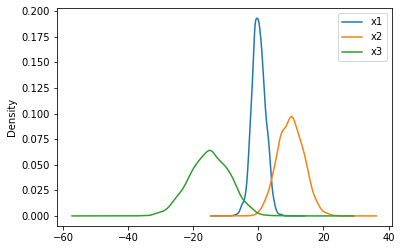

In [21]:
df_0 = pd.DataFrame({
    'x1': np.random.normal(0, 2, 1460),
    'x2': np.random.normal(10, 4, 1460),
    'x3': np.random.normal(-15, 6, 1460)
})
df_0.plot.kde()

Se importa el escalador y se inicializa

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Se generan datos escalados, el método `.fit_transform` es transversal en los transformadores de `preprocessing`, lo que hace es obtener los parámetros de transformación de los datos proporcionados y transformar (todo en un paso). Es una abreviación de los métodos `.fit` para obtención de parámetros y `.transform()` para aplicar la transformación a nuevos datos. 

Por lo anterior, al aplicar `.fit_transform()` se obtienen los parámetros de media `.mean_` y desviación estándar `.scale_` para cada columna del dataframe operado. Observe que tales atributos del objeto tipo `StandardScaler` son públicos, observe además que es posible crear objetos que hereden de tal clase y por tanto, anular sus métodos utilizando métodos propios, recuerde que Python soporta Duck typing.

Se obtienen los parámetros y se transforman las columnas generadas

In [45]:
df_1 = scaler.fit_transform(df_0)
df_1 = pd.DataFrame(df_1, columns=['x1','x2','x3'])

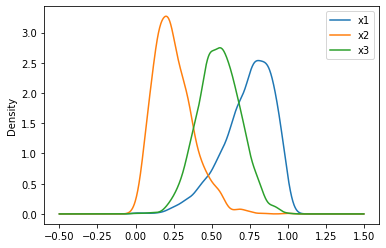

In [46]:
df_1.plot.kde()

A continuación se implementa la función `scaler_test` que simplifica el proceso anterior

In [63]:
def scaler_test(df, scaler, dat=False):
    ''' Simplifica el proceso de testear transformadores de datos.'''
    
    data = df.copy()
    data = scaler.fit_transform(data)
    data = pd.DataFrame(data, columns=df.columns)
    data.plot.kde()

    if dat:
        return data

#### Escalamiento mínimo-máximo

Una buena alternativa al método anterior, es el escalamiento por rango, este tiene la forma:

\begin{equation}
\frac{x_{i} - \min(x)}{\max (x)-\min (x)}
\end{equation}

para $x$ columna a tratar, $x_i$ elemento a transformar. Esta transformación permite hacer que los datos se muevan entre 0 y 1 y puede ser utilizado y la distribución de los datos a tratar no cumple la hipotesis de normalidad (recordar test Z). Observe que este transformador se ve afectado por la presencia de outliers. 

**Ejemplo**

Se generan 3 distribuciones y se estudia la transformación

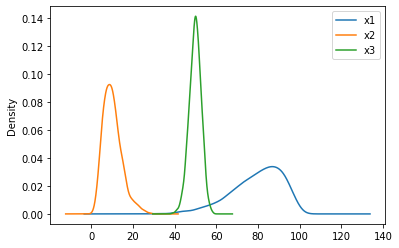

In [64]:
df_0 = pd.DataFrame({
    'x1': np.random.beta(8, 2, 1460)*100,
    'x2': np.random.chisquare(10, 1460),
    'x3': np.random.normal(50, 3, 1460)
})

df_0.plot.kde()

Se importa el objeto `MinMaxScaler`

In [65]:
from sklearn.preprocessing import MinMaxScaler

Se prueba la transformación,

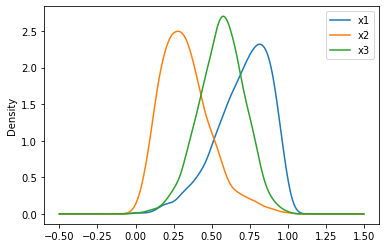

In [72]:
scaler = MinMaxScaler()
data = scaler_test(df_0, scaler, dat=True)

Se comprueban minimos y máximos:

In [74]:
print('data min:', data.min())
print('data max:', data.max())

data min: x1    0.0
x2    0.0
x3    0.0
dtype: float64
data max: x1    1.0
x2    1.0
x3    1.0
dtype: float64


Si se desea escalar por rengo, la mejor práctica es comprender los mínimos y máximos *absolutos* para cada columna. Esto se refiere, a las cotas superiores e inferiores que posee la columna **por definición**, a modo de ejemplo, considere un dataframe con las notas de una asginatura donde se enzeña análisis de datos, se sabe que la nota máxima en cierto ítem se codifica en una columna y su máximo es en efecto es 7.0, sin embargo el mínimo en dicha columna es 1.5, que es distinto al mínimo natural para dicho item que es 1.0. Esto puede acarrear problemas con datos nuevos, sobretodo si aparece una nota inferior a 1.5. 

**Ejercicios**

1. Investigue los parámetros que se deben usar para proporcionar escalamiento por rango con valores máximos y mínimos proporcionados explícitamente. 

2. Estudie el transformador `MaxAbsScaler`.

#### Transformación robusta

Cuando se trabaja con columnas que poseen valores fuera de rango (outliers) las transformaciones anteriores pueden fallar. En este caso, se recomienda utilizar una transformación de la forma

\begin{equation}
\frac{x_i - Q_1(x)}{IQR(x)}
\end{equation}

Donde $IQR = Q_3(x) - Q_1(x)$ es el rango intercuartílico de la columna $x$. 

**Ejemplo**

Se generan datos con outliers

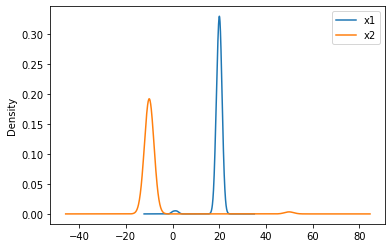

In [77]:
df = pd.DataFrame({
    'x1': np.concatenate([np.random.normal(20, 1, 1460), np.random.normal(1, 1, 25)]),
    'x2': np.concatenate([np.random.normal(-10, 1, 1460), np.random.normal(50, 1, 25)]),
})
df.plot.kde()

Se importa el objeto `RobustScaler` y se aplica

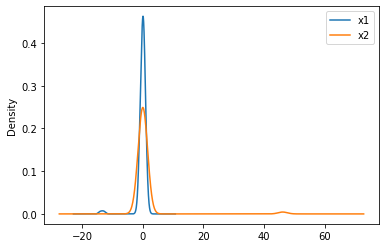

In [78]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

scaler_test(df, scaler)

Se puede observar como los datos son centrados pero se mantienen los outliers generados.

**Ejercicio**

1. Sea $k(x,y)$ un kernel definido por $\langle \phi(x), \phi(y) \rangle_{\mathcal{H}}$, donde $\phi: \mathcal{X} \rightarrow \mathcal{H}$ es una fución que opera elementos entre espacio de datos $\mathcal{X}$ y un espacio de Hilbert $\mathcal{H}$. Se sabe por el *truco del kernel* que algoritmos kernelizados obvian el tratamiento de *features* no lineales representadas por transformaciones del tipo $\phi(\cdot)$. Sin embargo, es posible centrar datos en el espacio de carácteristicas $\mathcal{H}$ utilizando la matriz de Gramm asociada a $k(x,y)$. Para efectuar tal procedimiento, estudie la clase `KernelCenterer`. ¿Que ventaja tiene usar este método?

#### Mapeo a distribuciones gaussianas 

Como mencionó anteriormente, no siempre se cumple la hipótesis de normalidad en las columnas de un dataset, en tal caso, no es una buena idea estandarizar los datos pues puede llevar a problemas al momento de operar con algoritmos que requieren normalidad en su formulación. Existe una familia de transformaciones paramétrica que busca aproximar una distribución arbitraria a una gaussiana, se accede a este tipo de transformaciones por medio de la clase `PowerTransformer`, en esta clase se encuentran 2 transformaciones:

* Yeo-Johnson dada por: 

\begin{equation}
x_{i}^{(\lambda)}=
\begin{cases}
\left[\left(x_{i} + 1\right)^{\lambda}-1 \right] / \lambda & \text { si } \lambda \neq 0, x_{i} \geq 0 \\
\ln \left(x_{i}+1\right) & \text { si } \lambda=0, x_{i} \geq 0 \\
-\left[\left(-x_{i}+1\right)^{2-\lambda}-1\right] /(2-\lambda) & \text { si } \lambda \neq 2, x_{i}<0 \\
-\ln \left(-x_{i}+1\right) & \text { si } \lambda=2, x_{i}<0
\end{cases}
\end{equation}

* Box-Cox: Solo puede ser utilizada en datos extrictamente positivos. Viene dada por:

\begin{equation}
x_{i}^{(\lambda)} =
\begin{cases}
\frac{x_{i}^{\lambda}-1}{\lambda} & \text { si } \lambda \neq 0 \\
\ln \left(x_{i}\right) & \text { si } \lambda=0
\end{cases}.
\end{equation}

En ambos casos, el parámetro $\lambda$ es estimado por máxima verosimilitud.

**Ejemplo**

La técnica de transformación por medio de potencias (power transform) permite estabilizar la varianza y ahcer que los datos se distribuyan de manera más similar a la distribución normal. Por lo general, se recomienda el uso de este tipo de transformaciones en datasets con pocas observaciones pues generalizan de manera rápida, además son fácilmente interpretables por medio del valor $\lambda$. Se definen distintas distribuciones de datos y se implementan las transformaciones anteriores

In [ ]:
from sklearn.preprocessing import PowerTransformer
n_sample = 1460

transformer_bc = PowerTransformer(method='box-cox')
transformer_yj = PowerTransformer(method='yeo-johnson')

Se genera un dataset con diferentes distribuciones por columna

In [4]:
import numpy as np

In [8]:
df = pd.DataFrame({
    'x_lognormal': np.random.lognormal(n_sample),
    'x_chisq': np.random.chisquare(5, n_sample),
    'x_weibull': np.random.weibull(30, n_sample),
    'x_gaussian': np.random.normal(25, n_sample),
    'x_uniform': np.random.uniform(0, 1, n_sample)
})

### Manejo de valores faltantes

Por lo general, existen razones prácticas y conceptuales a tener en cuenta cuando se trabaja con valores faltantes. 

En primer lugar, la falta de información introduce sesgos en los modelos de datos, pues hace que las muestras obtenidas no sean representativas del fenómeno que se desea estudiar, esto genera conclusiones sesgadas y puede llevar a tomar malas decisiones. 

En cuanto al componente práctico, los valores faltantes son incompatibles con algunos modelos de aprendizaje automático, debido a que estos modelos son parte de la razón fundamental de analizar un fenómeno por medio de datos,es que se necesita comprender bien los mecanismos de manejo de este tipo de valores. 

Según el contexto teórico anterior, el mecanismo de pérdida de información MCAR es el más sencillo en términos de modelación, pues solo requiere parametrizar la matriz indicadora de valores faltantes, sin considerar información fuera dentro de dataset. El test *MCAR de Little* sirve para probar si la información faltante en un dataset sigue la hipótesis MCAR. 

El test de Little evalúa diferencias en media entre subgrupos de datos con valores faltantes. Es una generalización del test-$t$ mencionado anteriormente. El estadístico de test es una suma ponderada según la ecuación:

\begin{equation}
\tag{eq:3}
\label{eq:3}
d^{2}=\sum_{j=1}^{J} n_{i}\left(\hat{\boldsymbol{\mu}}_{j}-\hat{\boldsymbol{\mu}}_{j}^{(\mathrm{ML})}\right)^{\mathrm{T}} \hat{\mathbf{\Sigma}}_{j}^{-1}\left(\hat{\boldsymbol{\mu}}_{j}-\hat{\boldsymbol{\mu}}_{j}^{(\mathrm{ML})}\right)
\end{equation}

Donde $n_j$ representa el numero de valores faltantes de la columna $j$. Dentro de la columna $j$ se generan grupos de valores faltantes en función de su relación con los valores faltantes de las demás columnas, así por ejemplo, el grupo 1 puede contabilizar solo aquellos valores faltantes para aquellas componentes (filas) presentes unicamente en la columna $j$ y que presentan información completa para todo $i \neq j$, por otra parte, el grupo 2, puede poseer aquellos valores faltantes para cuya componente posee información faltante en la columna $i \neq j$, pero inormación completa para todo $k \neq i,j$. Se generan grupos hasta agotar las combinaciones. Luego, $\hat{\boldsymbol{\mu}}_{j}$ representa un vector contenedor de medias para cada grupo, donde estas se medias, se calculan para las variables con información presente.
$\hat{\boldsymbol{\mu}}_{j}^{(\mathrm{ML})}$ representa un contenedor de estimadores de medias para cada grupo por medio de máxima verosimilitud. Finalmente $\hat{\mathbf{\Sigma}}_j$ represeta la matriz de covarianza entre cada grupo de la variable $j$.

Se implementa el test de Little para cuantificar si un conjunto de datos posee un mecanismo de información faltante MCAR:


In [785]:
def little_mcar(data):
    '''Impementacion del test MCAR de Little.
    
    Separa cada columna en grupos, segun el patron de perdida de
    informacion, para cada grupo calcula la media de informacion 
    completa (requiere hipotesis de normalidad en las columnas).
    Calcula la matriz de covarianza para las variables por 
    agrupacion con informacion completa. Finalemte calcula
    el estadistico (chi-cuadrado) de test y entrega su valor,
    los grados de libertad y el valor p.
    
    Args:
    -----
    data: Pandas DataFrame
        Un dataframe con valores faltantes
    
    Returns:
    --------
    
    d_2 : float
         Valor del estadisitico de prueba.
    
    deg_f: int
        Grados de libertad,
    
    p_value: float
        Valor p asociado al estadistico y grados de libertad.
    '''

    # Se copia el dataframe para evitar problemas de mutabilidad
    df = data.copy()

    # Se calcula el numero de variables en el dataset
    n_var = df.shape[1]

    # Se calcula la matriz indicadora de informacion faltante
    R = 1 * df.isnull()
    
    '''
    A cada patron de informacion faltante se asgina una llave, 
    por ejemplo, si el patron es del tipo:
    
    1 0 0 0 0 
    
    se asgina la llave 
    
    (1,0,0,0,0)
    
    De esta forma se diferencian patrones de perdida de informacion.
    posteriormente se generan grupos por columna basandose en esas
    llaves.
    '''

    R['signature'] = R.apply(tuple, axis=1)

    # Media: Implementar su estimador de maxima verosimilitud
    gmean = df.mean()

    # Covarianza del dataset: ignora valores faltantes
    gcov = df.cov()

    # propaga las llaves al dataset procesado
    df['signature'] = R['signature']

    # Se identifican los patrones unicos
    R.drop_duplicates(inplace=True)

    # Se asgina un codigo (int) a cada patron unico
    n_patterns = len(r)
    R['patterns'] = np.arange(n_patterns)

    # Se Genera un mapping del tipo llave -> codigo
    to_map = R[['signature', 'patterns']].values
    mapping = dict(to_map)

    # Se aplica el mapping para propagar codigos al dataset procesado
    df['patterns'] = df['signature'].map(mapping)

    # Agrupacion por patrones
    grouped = df.groupby('patterns')

    # Medias de cada columna por patron
    mu_j = grouped.mean()

    # Vector de cantidad de elementos por patron
    N_j = grouped['signature'].count()

    # Se elimina la llave, se mantienen solo los codigos
    df.drop('signature', axis=1, inplace=True)

    # Se obtienen subdatasets asociados a cada patron
    groups = (grouped.get_group(i) for i in range(n_patterns))

    # Se limpian eliminando la columna patterns y los valores faltantes
    groups = map(lambda x: x.dropna(axis=1), groups)
    groups = map(lambda x: x.drop('patterns', axis=1), groups)
    
    '''
    Con la agrupacion anterior se obtienen las variables 
    con informacion completa por patron
    '''
    
    full_info_vars = [g.columns for g in groups]

    #Se calculan las covarianzas de informacion completa por patron
    covs = (gcov.loc[var, var] for var in full_info_vars)

    # Se inveierten las covarianzas de manera eficiente
    inverter = lambda cov: np.linalg.solve(cov, np.identity(cov.shape[1]))
    sigma_inv = tuple(map(inverter, covs))

    # Se obtienen las medias con informacion completa por variable
    means_diff = mu_j - gmean
    means_diff = [means_diff.loc[n].dropna() for n in means_diff.index]

    # Se calcula (mu_j - mu_j^{ML}).T Sigma^{-1} (mu_j - mu_j^{ML})
    weights= map(lambda x: (x[0].T @ x[1]) @ x[2],
                       zip(means_diff, sigma_inv, means_diff))
    
    weights = np.array(tuple(weights))

    # Se obtienen los valores de interes (se calcula la suma)
    chi_stat = N_j.dot(weights) # estadistico d^2
    deg_f = N_j.sum() - n_var # grados de libertad

    p_value = 1 - stats.chi2.cdf(chi_stat,deg_f)

    return {'chi_stat': chi_stat, 'deg_f': deg_f, 'p_value': p_value}

Antes de utilizar el test anterior y como medida general, es necesario preprocesar los datos, de manera tal que tengan un formato homogéneo.

Metodologias de manejo de datos faltantes 1

In [721]:
# collect the various features
cat_ftrs = ['MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood','Condition1','Condition2',\
            'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation',\
           'Heating','CentralAir','Electrical','GarageType','PavedDrive','MiscFeature','SaleType','SaleCondition']
ordinal_ftrs = ['LotShape','Utilities','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure',\
               'BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','Functional','FireplaceQu','GarageFinish',\
               'GarageQual','GarageCond','PoolQC','Fence']
ordinal_cats = [['Reg','IR1','IR2','IR3'],['AllPub','NoSewr','NoSeWa','ELO'],['Gtl','Mod','Sev'],\
               ['Po','Fa','TA','Gd','Ex'],['Po','Fa','TA','Gd','Ex'],['NA','Po','Fa','TA','Gd','Ex'],\
               ['NA','Po','Fa','TA','Gd','Ex'],['NA','No','Mn','Av','Gd'],['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],\
               ['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],['Po','Fa','TA','Gd','Ex'],['Po','Fa','TA','Gd','Ex'],\
               ['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],['NA','Po','Fa','TA','Gd','Ex'],\
               ['NA','Unf','RFn','Fin'],['NA','Po','Fa','TA','Gd','Ex'],['NA','Po','Fa','TA','Gd','Ex'],
               ['NA','Fa','TA','Gd','Ex'],['NA','MnWw','GdWo','MnPrv','GdPrv']]
num_ftrs = ['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd',\
             'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',\
             'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',\
             'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF',\
             'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']

In [723]:
# preprocess with pipeline and columntransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# one-hot encoder
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])

# ordinal encoder
ordinal_transformer = Pipeline(steps=[
    ('imputer2', SimpleImputer(strategy='constant',fill_value='NA')),
    ('ordinal', OrdinalEncoder(categories = ordinal_cats))])

# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# collect the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_ftrs),
        ('cat', categorical_transformer, cat_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs)])



In [724]:
# fit_transform the training set
X_prep = preprocessor.fit_transform(X_train)
# little hacky, but collect feature names
feature_names = preprocessor.transformers_[0][-1] + \
                list(preprocessor.named_transformers_['cat'][1].get_feature_names(cat_ftrs)) + \
                preprocessor.transformers_[2][-1]

df_train = pd.DataFrame(data=X_prep,columns=feature_names)
print(df_train.shape)

# transform the test
df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=df_test,columns = feature_names)
print(df_test.shape)

# transform  the holdout
df_holdout = preprocessor.transform(X_holdout)
df_holdout = pd.DataFrame(data=df_holdout,columns = feature_names)
print(df_holdout.shape)

(876, 221)
(292, 221)
(292, 221)


In [750]:
print('data dimensions:',df_train.shape)
print('the p value of the mcar test:',mcar_test(df_train))
perc_missing_per_ftr = df_train.isnull().sum(axis=0)/df_train.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
frac_missing = sum(df_train.isnull().sum(axis=1)!=0)/df_train.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (876, 221)
the p value of the mcar test: 0.0
fraction of missing values in features:
LotFrontage    0.173516
MasVnrArea     0.004566
GarageYrBlt    0.050228
dtype: float64
fraction of points with missing values: 0.2237442922374429
